In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv('../data/heart_disease.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319793.000000,319795.00000,319795.000000,319795.000000
mean,28.325407,3.37171,3.898366,7.097075
std,6.356104,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319793 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319794 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df.isnull().sum()

HeartDisease        0
BMI                 2
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         1
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(18078)

In [11]:
df['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [12]:
df['HeartDisease'].value_counts(normalize=True)

HeartDisease
No     0.914405
Yes    0.085595
Name: proportion, dtype: float64

Text(0.5, 0, 'Count')

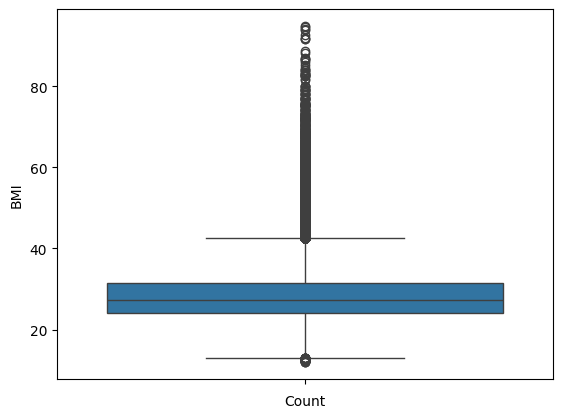

In [13]:
sns.boxplot(df['BMI'])
plt.xlabel("Count")

Text(0.5, 0, 'Count')

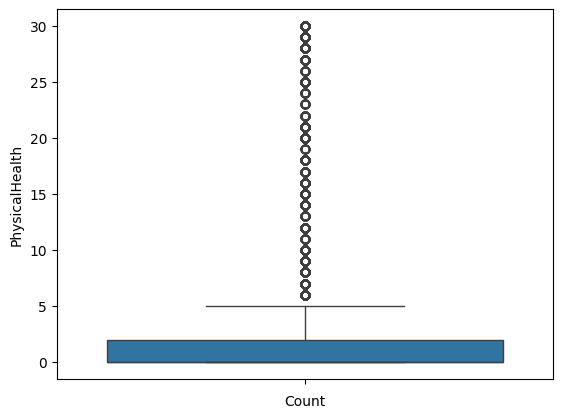

In [14]:
sns.boxplot(df['PhysicalHealth'])
plt.xlabel("Count")

In [15]:
df_num = df.select_dtypes(include=['float','int']).columns.tolist()
df_cat = df.select_dtypes(include='object').columns.tolist()

print(f"Numerical columns: ",df_num)

print(f"Categorical columns: ",df_cat)

Numerical columns:  ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
Categorical columns:  ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


In [16]:
df = df.dropna()


In [17]:
df[df_num] = df[df_num].fillna(df[df_num].mean())

C:\Users\heman\AppData\Local\Temp\ipykernel_11116\1447678988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df_num] = df[df_num].fillna(df[df_num].mean())


In [18]:
for col in df_cat:
     df[col] = df[col].fillna(df[col].mode()[0])

C:\Users\heman\AppData\Local\Temp\ipykernel_11116\568675125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


In [21]:
print(f"Before Dropping duplicated rows:{df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Before Dropping duplicated rows:{df.duplicated().sum()}")

Before Dropping duplicated rows:18078
Before Dropping duplicated rows:0


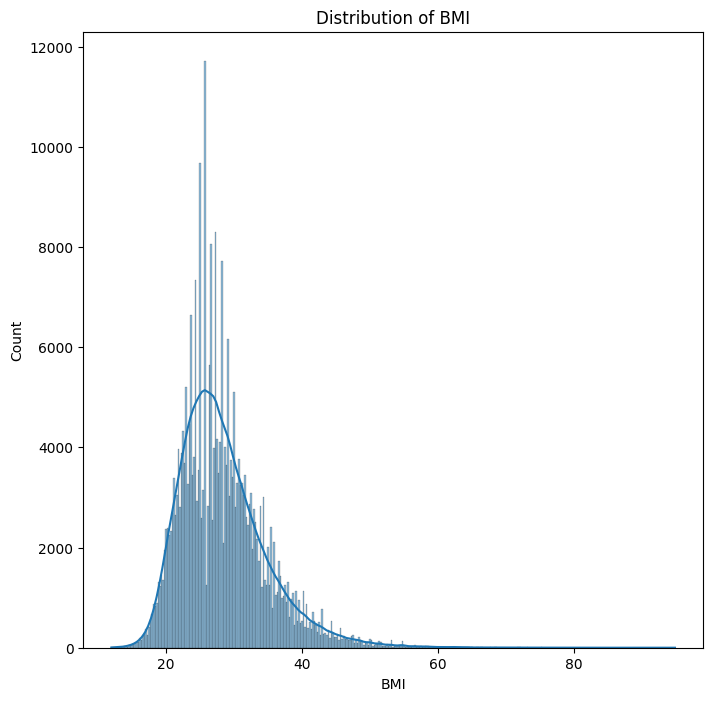

In [22]:
plt.figure(figsize=(8,8))
sns.histplot(df["BMI"],kde=True )
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()

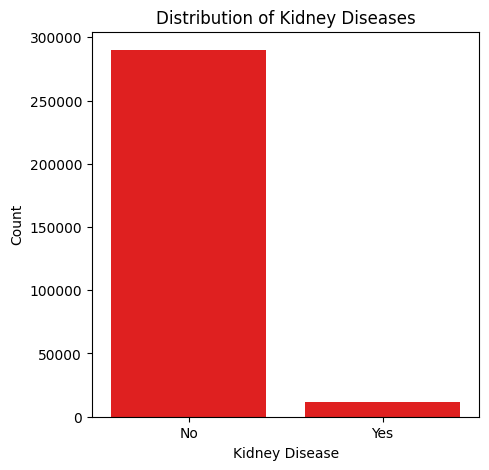

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x=df["KidneyDisease"],color='red')
plt.xlabel("Kidney Disease")
plt.ylabel("Count")
plt.title("Distribution of Kidney Diseases")
plt.show()

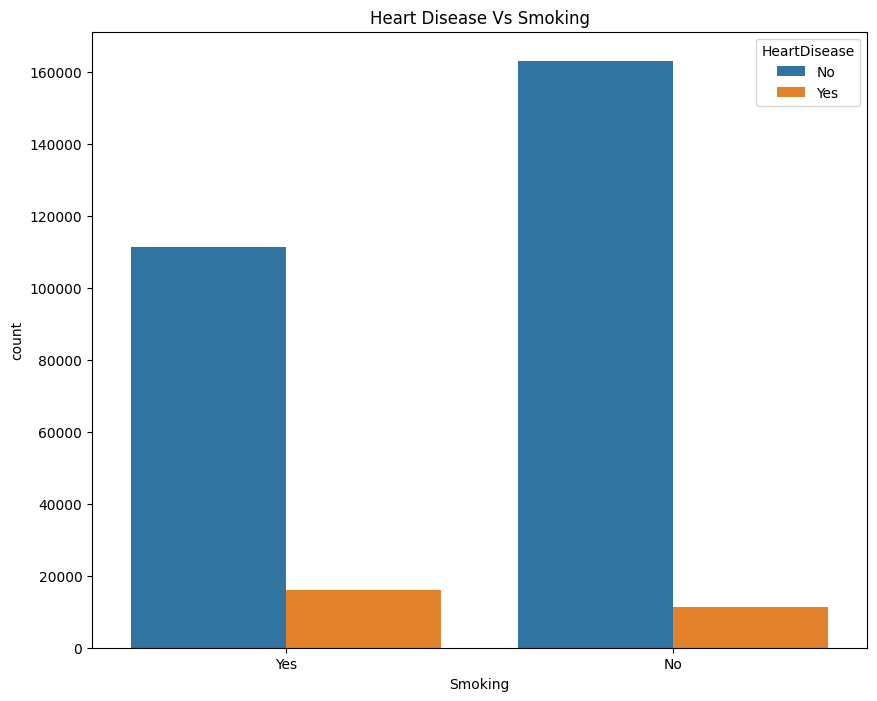

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x='Smoking', hue='HeartDisease', data=df)
plt.title("Heart Disease Vs Smoking")
plt.show()

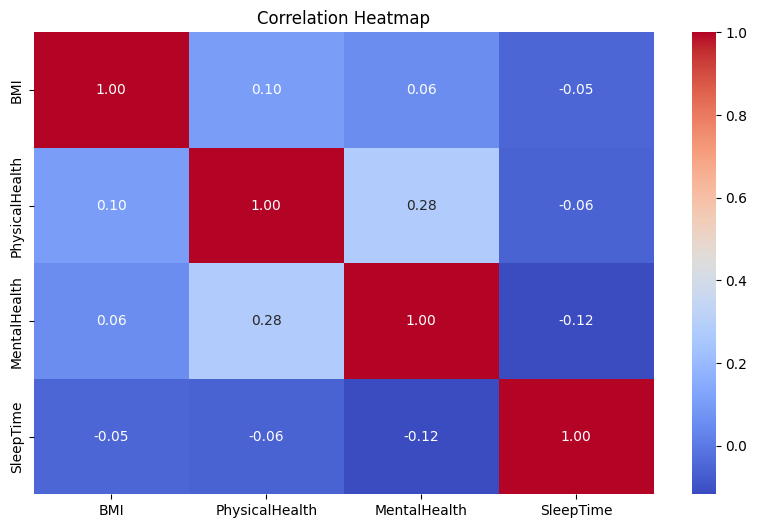

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df[df_num].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

<Axes: xlabel='HeartDisease', ylabel='count'>

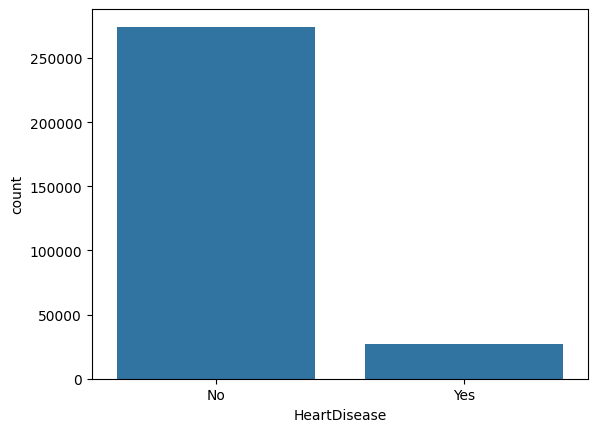

In [26]:
sns.countplot(x = df["HeartDisease"])